In [17]:
import os
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [41]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'SolarPrediction.csv'), delimiter=',')
# Importar las bibliotecas necesarias

# Leer el archivo csv desde el Google Drive
data = pd.read_csv('/content/gdrive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL/datasets/SolarPrediction.csv')


In [42]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [47]:
data =  data.dropna()

In [48]:
data.shape

(32686, 11)

In [49]:
rm = data.drop(columns = {"Data", "Time", "TimeSunRise", "TimeSunSet" })

In [50]:
rm.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,1.21,48,30.46,59,177.39,5.62
1,1475229023,1.21,48,30.46,58,176.78,3.37
2,1475228726,1.23,48,30.46,57,158.75,3.37
3,1475228421,1.21,48,30.46,60,137.71,3.37
4,1475228124,1.17,48,30.46,62,104.95,5.62


In [137]:
rm.shape

(32686, 7)

In [138]:
X = rm.iloc[:, :2].values  # Tomar las primeras 2 columnas
y = rm.iloc[:, 2].values    # Tomar la columna 2

m = y.size

print(m)
# Imprimir algunos puntos de datos con solo 2 decimales
print('{:>15s}{:>15s}{:>15s}'.format('X[:,1]', 'X[:, 2]', 'y'))
print('-' * 55)
for i in range(10):
    print('{:15.0f}{:15.2f}{:15.2f}'.format(X[i, 0], X[i, 1], y[i]))


32686
         X[:,1]        X[:, 2]              y
-------------------------------------------------------
     1475229326           1.21          48.00
     1475229023           1.21          48.00
     1475228726           1.23          48.00
     1475228421           1.21          48.00
     1475228124           1.17          48.00
     1475227824           1.21          48.00
     1475227519           1.20          49.00
     1475227222           1.24          49.00
     1475226922           1.23          49.00
     1475226622           1.21          49.00


In [139]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [140]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.47522933e+09 1.21000000e+00]
 [1.47522902e+09 1.21000000e+00]
 [1.47522873e+09 1.23000000e+00]
 ...
 [1.48058700e+09 1.20000000e+00]
 [1.48058670e+09 1.23000000e+00]
 [1.48058640e+09 1.20000000e+00]]
Media calculada: [1.47804726e+09 2.07124697e+02]
Desviación estandar calculada: [3.00499067e+06 3.15911555e+02]
[[-0.93775298 -0.65181123]
 [-0.93785381 -0.65181123]
 [-0.93795264 -0.65174792]
 ...
 [ 0.84517269 -0.65184288]
 [ 0.84507319 -0.65174792]
 [ 0.84497336 -0.65184288]]


In [141]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [142]:
print(X)

[[ 1.         -0.93775298 -0.65181123]
 [ 1.         -0.93785381 -0.65181123]
 [ 1.         -0.93795264 -0.65174792]
 ...
 [ 1.          0.84517269 -0.65184288]
 [ 1.          0.84507319 -0.65174792]
 [ 1.          0.84497336 -0.65184288]]


In [143]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [144]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [50.1691378  -1.92099352  4.32745476]
La prediccion predecida para la radiacion en el tiempo 1480586402 y una radiacion de 1 (usando el descenso por el gradiente): $46


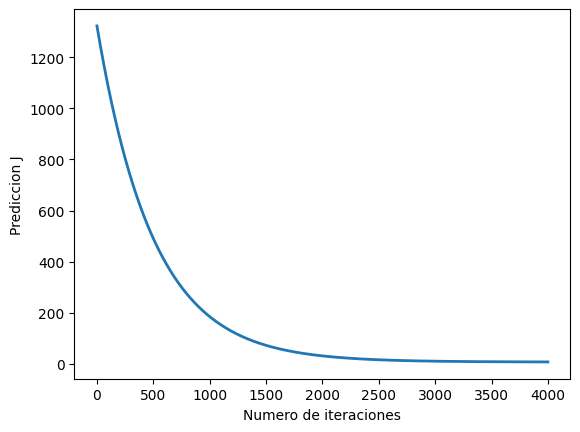

In [145]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Prediccion J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1480586402, 1]
X_array[1:3] = (X_array[1:3] - mu) / sigma
prediccion = np.dot(X_array, theta)   # Se debe cambiar esto

print('La prediccion predecida para la radiacion en el tiempo 1480586402 y una radiacion de 1 (usando el descenso por el gradiente): ${:.0f}'.format(prediccion))


In [146]:
X_array = [1, 1480586403, 1]
X_array[1:3] = (X_array[1:3] - mu) / sigma
prediccion = np.dot(X_array, theta)

print('La prediccion predecida para la radiacion en el tiempo 1480586403 y una radiacion de 1 (usando el descenso por el gradiente): ${:.0f}'.format(prediccion))

La prediccion predecida para la radiacion en el tiempo 1480586403 y una radiacion de 1 (usando el descenso por el gradiente): $46


In [147]:
X = rm.iloc[:, :2].values  # Tomar las primeras 2 columnas
y = rm.iloc[:, 2].values    # Tomar la columna 2

m = y.size

print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

32686


In [148]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [149]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 1480586402, 1]
prediccion = np.dot(X_array, theta)

print('Prediccion de radiacion parecida en el tiempo 1480586402 y una radiacion de 1 (usando la ecuación de la normal): ${:.0f}'.format(prediccion))

Theta calculado a partir de la ecuación de la normal: [ 9.98274614e+02 -6.42778162e-07  1.39295107e-02]
Prediccion de radiacion parecida en el tiempo 1480586402 y una radiacion de 1 (usando la ecuación de la normal): $47
